In [3]:
%cd "F:\University\Master's Thesis\Datasets\rnd"

F:\University\Master's Thesis\Datasets\rnd


In [9]:
import os
import pandas as pd

# Specify the path to the parent folder containing the monthly data folders
parent_folder = ""

# Loop through VMs (1.csv, 2.csv, 3.csv, ...) for each month
for vm_number in range(1, 501):
    # Create an empty DataFrame to store concatenated data
    combined_df = pd.DataFrame()

    # Loop through the three months
    for month in range(1, 4):
        # Construct the path to the CSV file for the current VM and month
        csv_path = os.path.join(parent_folder, str(month), f"{vm_number}.csv")

        # Check if the CSV file exists
        if os.path.exists(csv_path):
            # Read the CSV file with semicolon (;) as the separator
            vm_data = pd.read_csv(csv_path, sep=';')
            combined_df = pd.concat([combined_df, vm_data], ignore_index=True)

    # Save the combined DataFrame to a new CSV file (VM001.csv, VM002.csv, ...)
    combined_df.to_csv(os.path.join("Total VM Data/", f"VM{vm_number:03d}.csv"), index=False)

print("Data concatenation and saving completed.")


Data concatenation and saving completed.


In [10]:
# Specify the path to the parent folder containing the VM files
parent_folder = "Total VM Data/"

# Loop through VM files (VM001.csv, VM002.csv, VM003.csv, ...)
for vm_number in range(1, 501):
    # Construct the path to the VM file
    vm_file_path = os.path.join(parent_folder, f"VM{vm_number:03d}.csv")

    # Check if the VM file exists
    if os.path.exists(vm_file_path):
        # Read the VM file
        vm_data = pd.read_csv(vm_file_path)

        # Add a constant column with the VM number
        vm_data.insert(0, 'VM', f'VM{vm_number:03d}')

        # Save the modified DataFrame back to the VM file
        vm_data.to_csv(vm_file_path, index=False)

print("Constant column addition completed.")

Constant column addition completed.


In [3]:
import os
import pandas as pd

# Specify the path to the parent folder containing the VM files
parent_folder = "Total VM Data/"

# Loop through VM files (VM001.csv, VM002.csv, VM003.csv, ...)
for vm_number in range(1, 501):
    # Construct the path to the VM file
    vm_file_path = os.path.join(parent_folder, f"VM{vm_number:03d}.csv")

    # Check if the VM file exists
    if os.path.exists(vm_file_path):
        # Read the VM file
        vm_data = pd.read_csv(vm_file_path)

        # Add a time_idx column with the VM number
        vm_data['time_idx'] = range(1, len(vm_data) + 1)

        # Save the modified DataFrame back to the VM file
        vm_data.to_csv(vm_file_path, index=False)

print("time_idx column addition completed.")

time_idx column addition completed.


In [8]:
import os
import pandas as pd
from sklearn.ensemble import IsolationForest

# Specify the path to the parent folder containing the VM files
parent_folder = "Total VM Data/"

# Loop through VM files (VM001.csv, VM002.csv, VM003.csv, ...)
for vm_number in range(1, 501):
    # Construct the path to the VM file
    vm_file_path = os.path.join(parent_folder, f"VM{vm_number:03d}.csv")

    # Check if the VM file exists
    if os.path.exists(vm_file_path):
        # Read the VM file with tab-separated values
        vm_data = pd.read_csv(vm_file_path)

        # Fix column headers by removing leading or trailing spaces
        vm_data.columns = vm_data.columns.str.strip()

        # Check if the required columns exist
        if 'Memory capacity provisioned [KB]' in vm_data.columns and 'Memory usage [KB]' in vm_data.columns:
            # Calculate Memory usage percentage with handling zero values
            vm_data['Memory usage [%]'] = (
                vm_data['Memory usage [KB]'] / vm_data['Memory capacity provisioned [KB]']
            ).apply(lambda x: 0 if pd.isna(x) or x == float('inf') else x * 100)

            # Assuming df is your pandas DataFrame containing the dataset
            X = vm_data[["Memory usage [%]"]].values
            
            # Create and fit the Isolation Forest model
            iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
            outliers = iso_forest.fit_predict(X)
            
            # Print the number of outliers before and after removing outliers
            print(f"For {vm_file_path}:")
            print("Number of outliers before removal:", sum(outliers == -1))
            
            # Identify and remove outliers
            vm_data = vm_data[outliers == 1]

            # Print the cleaned dataset shape
            print("Cleaned dataset shape:", vm_data.shape)

            # Save the modified DataFrame back to the VM file
            vm_data.to_csv(vm_file_path, index=False)

            print("Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.")
        else:
            print(f"Required columns not found in {vm_file_path}.")


For Total VM Data/VM001.csv:
Number of outliers before removal: 1242
Cleaned dataset shape: (23978, 14)
Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.
For Total VM Data/VM002.csv:
Number of outliers before removal: 1020
Cleaned dataset shape: (24206, 14)
Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.
For Total VM Data/VM003.csv:
Number of outliers before removal: 1154
Cleaned dataset shape: (24035, 14)
Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.
For Total VM Data/VM004.csv:
Number of outliers before removal: 1260
Cleaned dataset shape: (23927, 14)
Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.
For Total VM Data/VM005.csv:
Number of outliers before removal: 1258
Cleaned dataset shape: (23966, 14)
Outliers removed, 'Memory usage [%]' added, and column headers fixed in the data.
For Total VM Data/VM006.csv:
Number of outliers before removal: 1260
C

In [9]:
import os
import pandas as pd

# Specify the path to the parent folder containing the modified VM files
parent_folder = "Total VM Data/"

# Create an empty DataFrame to store concatenated data
combined_all_df = pd.DataFrame()

# Loop through VM files (VM001.csv, VM002.csv, VM003.csv, ...)
for vm_number in range(1, 501):
    # Construct the path to the modified VM file
    modified_vm_file_path = os.path.join(parent_folder, f"VM{vm_number:03d}.csv")

    # Check if the modified VM file exists
    if os.path.exists(modified_vm_file_path):
        # Read the modified VM file
        modified_vm_data = pd.read_csv(modified_vm_file_path)

        # Concatenate the data to the combined DataFrame
        combined_all_df = pd.concat([combined_all_df, modified_vm_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_all_df.to_csv(os.path.join("", "bitbrains_structured_data.csv"), index=False)

print("Combining files into bitbrains_structured_data.csv completed.")


Combining files into bitbrains_structured_data.csv completed.


In [18]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming the CSV file is in the current working directory
file_path = 'Total VM Data/VM001.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Convert "Timestamp [s]" to datetime
df['Timestamp [s]'] = pd.to_datetime(df['Timestamp [ms]'], unit='s')

# Generate a time range with 1-second frequency
full_time_range = pd.date_range(start=df['Timestamp [s]'].min(), end=df['Timestamp [s]'].max(), freq='S')

# Create a DataFrame with the full time range
full_df = pd.DataFrame({'Timestamp [s]': full_time_range})

# Merge the original DataFrame with the full DataFrame
df = pd.merge(full_df, df, on='Timestamp [s]', how='left')

# Columns to exclude from interpolation
exclude_columns = ['Timestamp [s]', "VM", "CPU cores", "CPU capacity provisioned [MHZ]", "Memory capacity provisioned [KB]"]

# Columns to interpolate
columns_to_interpolate = df.columns.difference(exclude_columns)

# Create an IterativeImputer
imputer = IterativeImputer(random_state=42)

# Set Timestamp [s] as the index
df.set_index('Timestamp [s]', inplace=True)

# Resample to minute intervals
df_resampled = df.resample('T').mean()

# Extend the time range by adding 15 days
extended_time_range = pd.date_range(start=df_resampled.index.min(), periods=len(df_resampled) + 75 * 24 * 60, freq='T')

# Create a DataFrame with the extended time range
extended_df = pd.DataFrame({'Timestamp [s]': extended_time_range})

# Merge the resampled DataFrame with the extended DataFrame
df_resampled_extended = pd.merge(extended_df, df_resampled, on='Timestamp [s]', how='left')

# Apply imputation to the specified columns on the extended DataFrame
df_resampled_extended[columns_to_interpolate] = imputer.fit_transform(df_resampled_extended[columns_to_interpolate])

# Reset the index to have Timestamp [s] as a regular column
df_resampled_extended.reset_index(inplace=True)

df_resampled_extended["VM"] = "VM001"
df_resampled_extended["CPU cores"] = 2.0
df_resampled_extended["CPU capacity provisioned [MHZ]"] = 5851.9989
df_resampled_extended["Memory capacity provisioned [KB]"] = 8218624.0

df_resampled_extended.head(-1)


C:\Users\Shahzaib Shaikh\AppData\Local\Temp\ipykernel_16532\840281423.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('T').mean()


,index,Timestamp [s],Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],time_idx,Memory usage [%],VM
0,0,2013-06-30 22:03:00,1.372630e+09,2.0,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1.00000,12.588394,VM001
1,1,2013-06-30 22:04:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
2,2,2013-06-30 22:05:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
3,3,2013-06-30 22:06:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
4,4,2013-06-30 22:07:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239030,239030,2013-12-13 21:53:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
239031,239031,2013-12-13 21:54:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
239032,239032,2013-12-13 21:55:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001
239033,239033,2013-12-13 21:56:00,1.376715e+09,2.0,5851.9989,261.946845,4.476194,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,4.988723,VM001


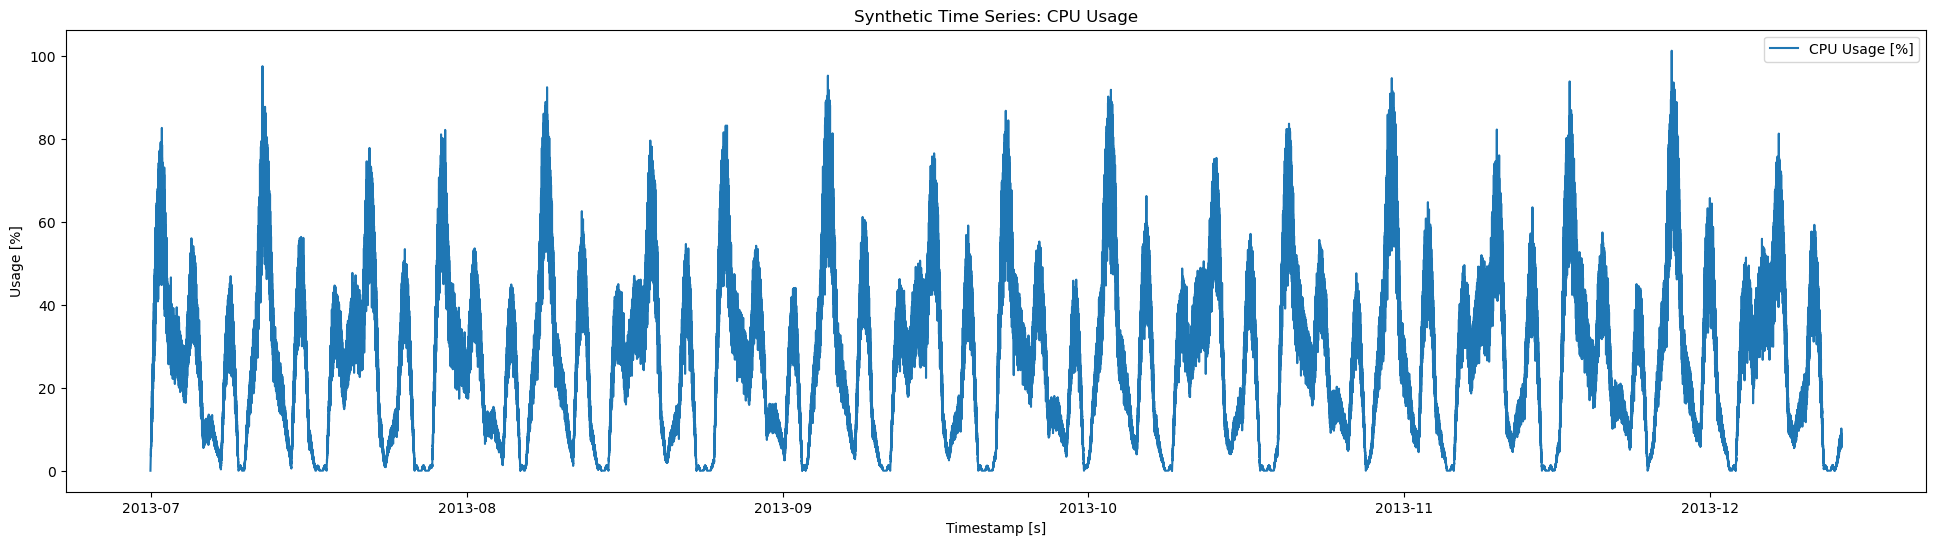

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_forecasting.data.examples import generate_ar_data

# Generate synthetic CPU and Memory usage with daily and weekly seasonality using pytorch_forecasting
data_ambient1 = generate_ar_data(seasonality=36, timesteps=len(df_resampled_extended), n_series=1, seed=42, trend=1, level=10)
data_ambient2 = generate_ar_data(seasonality=48, timesteps=len(df_resampled_extended), n_series=1, seed=42, trend=0, level=36)
data_weekend = generate_ar_data(seasonality=18, timesteps=len(df_resampled_extended), n_series=1, seed=42, trend=0, level=30.0)
data_weekday = generate_ar_data(seasonality=240, timesteps=len(df_resampled_extended), n_series=1, seed=22, trend=0, level=4.0)

# Extract generated data for CPU and Memory usage
cpu_usage1 = np.clip(data_weekend["value"], 0, 100)
cpu_usage2 = np.clip(data_weekday["value"], 0, 100)
cpu_usage3 = np.clip(data_ambient1["value"], 0, 100)
cpu_usage4 = np.clip(data_ambient2["value"], 0, 100)

# Assign generated data to DataFrame
df_resampled_extended['CPU usage [%]'] = cpu_usage1 + cpu_usage2 + cpu_usage3 + cpu_usage4

# Plot the generated time series
plt.figure(figsize=(24, 6))
plt.plot(df_resampled_extended['Timestamp [s]'], df_resampled_extended['CPU usage [%]'], label='CPU Usage [%]')
plt.title('Synthetic Time Series: CPU Usage')
plt.xlabel('Timestamp [s]')
plt.ylabel('Usage [%]')
plt.legend()
plt.show()


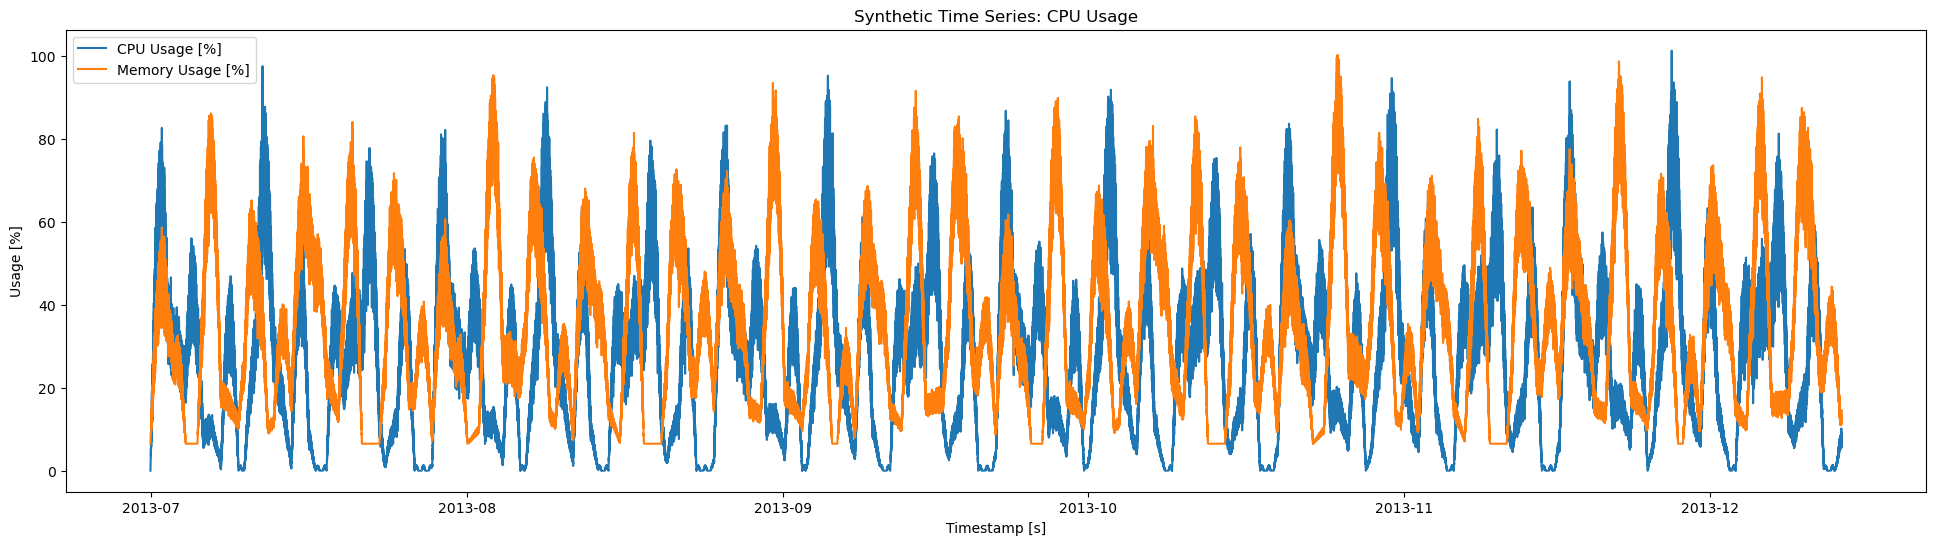

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_forecasting.data.examples import generate_ar_data

# Generate synthetic CPU and Memory usage with daily and weekly seasonality using pytorch_forecasting
data_ambient1 = generate_ar_data(seasonality=36, timesteps=len(df_resampled_extended), n_series=1, seed=42, trend=0.2, level=40)
data_ambient2 = generate_ar_data(seasonality=48, timesteps=len(df_resampled_extended), n_series=1, seed=12, trend=0, level=50)
data_weekend = generate_ar_data(seasonality=18, timesteps=len(df_resampled_extended), n_series=1, seed=22, trend=0, level=45.0)
data_weekday = generate_ar_data(seasonality=8, timesteps=len(df_resampled_extended), n_series=1, seed=22, trend=0, level=40.0)

# Extract generated data for CPU and Memory usage
cpu_usage1 = np.clip(data_weekend["value"], 0, 100)
cpu_usage2 = np.clip(data_weekday["value"], 0, 100)
cpu_usage3 = np.clip(data_ambient1["value"], 0, 100)
cpu_usage4 = np.clip(data_ambient2["value"], 0, 100)

# Assign generated data to DataFrame
df_resampled_extended['Memory usage [%]'] = cpu_usage1 + cpu_usage2 + cpu_usage3 + cpu_usage4 + 6.5

# Plot the generated time series
plt.figure(figsize=(24, 6))
plt.plot(df_resampled_extended['Timestamp [s]'], df_resampled_extended['CPU usage [%]'], label='CPU Usage [%]')
plt.plot(df_resampled_extended['Timestamp [s]'], df_resampled_extended['Memory usage [%]'], label='Memory Usage [%]')
plt.title('Synthetic Time Series: CPU Usage')
plt.xlabel('Timestamp [s]')
plt.ylabel('Usage [%]')
plt.legend()
plt.show()


In [26]:
df_resampled_extended.to_csv('VM001.csv', index=False)

In [24]:
df_resampled_extended.head()

,index,Timestamp [s],Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],time_idx,Memory usage [%],VM
0,0,2013-06-30 22:03:00,1.372630e+09,2.0,5851.9989,87.779984,0.000000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1.00000,6.500000,VM001
1,1,2013-06-30 22:04:00,1.376715e+09,2.0,5851.9989,261.946845,0.066578,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,6.536489,VM001
2,2,2013-06-30 22:05:00,1.376715e+09,2.0,5851.9989,261.946845,0.157880,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,6.586528,VM001
3,3,2013-06-30 22:06:00,1.376715e+09,2.0,5851.9989,261.946845,0.220217,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,6.620693,VM001
4,4,2013-06-30 22:07:00,1.376715e+09,2.0,5851.9989,261.946845,0.259892,8218624.0,4.184454e+05,1.182115,1.367650,8.681705,14.123763,12988.32509,6.642437,VM001


In [4]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv("VM001.csv")

# Function to classify failures based on CPU and Memory values
def classify_failure(row):
    memory_usage = row['Memory usage [%]']
    cpu_usage = row['CPU usage [%]']

    if memory_usage < 20 and cpu_usage < 20:
        return "Idle or Low-Traffic"
    elif memory_usage < 20 and 20 <= cpu_usage <= 70:
        return "Normal Operation"
    elif memory_usage < 20 and cpu_usage > 70:
        return "Processing Intensive Operation"
    elif 20 <= memory_usage <= 70 and cpu_usage < 20:
        return "Normal Operation"
    elif 20 <= memory_usage <= 70 and 20 <= cpu_usage <= 70:
        return "Normal Operation"
    elif 20 <= memory_usage <= 70 and cpu_usage > 70:
        return "Processing Intensive Operation"
    elif memory_usage > 70 and cpu_usage < 20:
        return "Potential Memory Leak"
    elif memory_usage > 70 and 20 <= cpu_usage <= 70:
        return "Memory-Intensive Operation"
    elif memory_usage > 70 and cpu_usage > 70:
        return "Resource-Intensive Operation"
    else:
        return "Unknown State"

# Apply the function to create the 'Failure Classification' column
df['Failure Classification'] = df.apply(classify_failure, axis=1)

# Display the updated DataFrame
print(df)


         index        Timestamp [s]  Timestamp [ms]  CPU cores  \
0            0  2013-06-30 22:03:00    1.372630e+09        2.0   
1            1  2013-06-30 22:04:00    1.376715e+09        2.0   
2            2  2013-06-30 22:05:00    1.376715e+09        2.0   
3            3  2013-06-30 22:06:00    1.376715e+09        2.0   
4            4  2013-06-30 22:07:00    1.376715e+09        2.0   
...        ...                  ...             ...        ...   
239031  239031  2013-12-13 21:54:00    1.376715e+09        2.0   
239032  239032  2013-12-13 21:55:00    1.376715e+09        2.0   
239033  239033  2013-12-13 21:56:00    1.376715e+09        2.0   
239034  239034  2013-12-13 21:57:00    1.376715e+09        2.0   
239035  239035  2013-12-13 21:58:00    1.376715e+09        2.0   

        CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
0                            5851.9989        87.779984       0.000000   
1                            5851.9989       261.946845    

In [6]:
# Count the frequency of each label
label_counts = df['Failure Classification'].value_counts()

# Display the result
print("Frequency of each label:")
print(label_counts)

Frequency of each label:
Normal Operation                  203218
Idle or Low-Traffic                20103
Potential Memory Leak               7623
Processing Intensive Operation      4564
Memory-Intensive Operation          3517
Resource-Intensive Operation          11
Name: Failure Classification, dtype: int64


In [12]:
import pandas as pd
import numpy as np

# Assuming df_http is your DataFrame
# Mapping from Failure Classification to HTTP Status codes
status_mapping = {
    "Idle or Low-Traffic": 200,
    "Normal Operation": 200,
    "Processing Intensive Operation": 503,
    "Potential Memory Leak": 429,
    "Memory-Intensive Operation": 429,
    "Resource-Intensive Operation": 504,
    "Unknown State": 503
}

# Define the probability for selecting the mapped status code
prob_mapped_status = 0.97

# Create a new 'HTTP Status' column based on the mapping with probability
df['HTTP Status'] = df['Failure Classification'].apply(lambda x: status_mapping[x] if np.random.rand() <= prob_mapped_status else np.random.choice([200, 429, 503, 504]))

# Display the DataFrame with the added 'HTTP Status' column
df.head(-1)


,index,Timestamp [s],Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],...,Network received throughput [KB/s],Network transmitted throughput [KB/s],time_idx,Memory usage [%],VM,Failure Classification,HTTP Route,HTTP Method,HTTP Status,Service Name
0,0,2013-06-30 22:03:00,1.372630e+09,2.0,5851.9989,87.779984,0.000000,8218624.0,1.034593e+06,160.866667,...,0.266667,1.466667,1.00000,6.500000,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
1,1,2013-06-30 22:04:00,1.376715e+09,2.0,5851.9989,261.946845,0.066578,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.536489,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
2,2,2013-06-30 22:05:00,1.376715e+09,2.0,5851.9989,261.946845,0.157880,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.586528,VM001,Idle or Low-Traffic,/api/v1/cart/add/{product_id},GET,200,ProductCatalogService
3,3,2013-06-30 22:06:00,1.376715e+09,2.0,5851.9989,261.946845,0.220217,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.620693,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
4,4,2013-06-30 22:07:00,1.376715e+09,2.0,5851.9989,261.946845,0.259892,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.642437,VM001,Idle or Low-Traffic,/api/v1/orders,GET,200,ProductCatalogService
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239030,239030,2013-12-13 21:53:00,1.376715e+09,2.0,5851.9989,261.946845,5.958158,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,11.280959,VM001,Idle or Low-Traffic,/api/v1/cart/remove/{product_id},GET,200,ProductCatalogService
239031,239031,2013-12-13 21:54:00,1.376715e+09,2.0,5851.9989,261.946845,6.337063,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,11.567609,VM001,Idle or Low-Traffic,/api/v1/orders/{order_id},GET,200,ProductCatalogService
239032,239032,2013-12-13 21:55:00,1.376715e+09,2.0,5851.9989,261.946845,7.714891,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,12.674611,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
239033,239033,2013-12-13 21:56:00,1.376715e+09,2.0,5851.9989,261.946845,10.173214,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,14.600788,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService


In [13]:
df.to_csv('VM001.csv', index=False)

In [14]:
df.head(-100)

,index,Timestamp [s],Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],...,Network received throughput [KB/s],Network transmitted throughput [KB/s],time_idx,Memory usage [%],VM,Failure Classification,HTTP Route,HTTP Method,HTTP Status,Service Name
0,0,2013-06-30 22:03:00,1.372630e+09,2.0,5851.9989,87.779984,0.000000,8218624.0,1.034593e+06,160.866667,...,0.266667,1.466667,1.00000,6.500000,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
1,1,2013-06-30 22:04:00,1.376715e+09,2.0,5851.9989,261.946845,0.066578,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.536489,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
2,2,2013-06-30 22:05:00,1.376715e+09,2.0,5851.9989,261.946845,0.157880,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.586528,VM001,Idle or Low-Traffic,/api/v1/cart/add/{product_id},GET,200,ProductCatalogService
3,3,2013-06-30 22:06:00,1.376715e+09,2.0,5851.9989,261.946845,0.220217,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.620693,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
4,4,2013-06-30 22:07:00,1.376715e+09,2.0,5851.9989,261.946845,0.259892,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.642437,VM001,Idle or Low-Traffic,/api/v1/orders,GET,200,ProductCatalogService
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238931,238931,2013-12-13 20:14:00,1.376715e+09,2.0,5851.9989,261.946845,7.215274,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,12.092989,VM001,Idle or Low-Traffic,/api/v1/cart/add/{product_id},GET,503,ProductCatalogService
238932,238932,2013-12-13 20:15:00,1.376715e+09,2.0,5851.9989,261.946845,7.577941,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,12.011621,VM001,Idle or Low-Traffic,/api/v1/cart/remove/{product_id},GET,200,ProductCatalogService
238933,238933,2013-12-13 20:16:00,1.376715e+09,2.0,5851.9989,261.946845,6.856235,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,12.079580,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
238934,238934,2013-12-13 20:17:00,1.376715e+09,2.0,5851.9989,261.946845,7.577353,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,12.568160,VM001,Idle or Low-Traffic,/api/v1/orders/{order_id},GET,200,ProductCatalogService


In [17]:
import pandas as pd
import numpy as np
import random

# Load CSV file into a DataFrame
df = pd.read_csv("VM001.csv")

# List of service names
services = [
    'PaymentProcessingService', 'OrderManagementService', 'CustomerAuthenticationService',
    'ProductCatalogService', 'ShippingAndLogisticsService', 'UserAccountService',
    'ReviewAndRatingService', 'CustomerSupportService'
]

# Function to generate synthetic service data based on CPU and memory utilization
def generate_synthetic_data(df):
    df['Timestamp [s]'] = pd.to_datetime(df['Timestamp [s]'])
    
    # Initialize empty lists to store generated service data
    service_names = []
    http_methods = []

    # Iterate through the existing DataFrame
    for index, row in df.iterrows():
        cpu_usage = row['CPU usage [%]']
        memory_usage = row['Memory usage [%]']

        # Add 95% probability to the specific condition
        if 40 <= memory_usage <= 60 and 40 <= cpu_usage <= 60 and random.choices([True, False], weights=[0.95, 0.05])[0]:
            # Your custom logic here
            service_name = 'OrderManagementService'
            http_method = 'GET'
        elif memory_usage < 40 and cpu_usage < 40:
            # Your existing logic here
            service_name = 'ProductCatalogService'
            http_method = 'GET'
        elif cpu_usage > 60 and 40 <= memory_usage <= 60:
            # Your existing logic here
            service_name = 'PaymentProcessingService'
            http_method = 'PATCH'
        elif memory_usage > 60 and cpu_usage < 40:
            # Your existing logic here
            service_name = 'ShippingAndLogisticsService'
            http_method = 'POST'
        elif memory_usage > 60 and 40 <= cpu_usage <= 60:
            # Your existing logic here
            service_name = 'ReviewAndRatingService'
            http_method = 'PUT'
        elif memory_usage > 60 and cpu_usage > 60:
            # Your existing logic here
            service_name = 'OrderManagementService'
            http_method = 'DELETE'
        else:
            # Assign any random service and one of the methods
            service_name = random.choice(services)
            http_method = random.choice(['POST', 'GET', 'PATCH', 'DELETE'])

        # Append generated data to the lists
        service_names.append(service_name)
        http_methods.append(http_method)

    # Add new columns for service names and methods to the existing DataFrame
    df['Service Name'] = service_names
    df['HTTP Method'] = http_methods

    return df

# Call the function to generate synthetic service data
df_http = generate_synthetic_data(df)


In [18]:
df_http.head(20)

,index,Timestamp [s],Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],...,Network received throughput [KB/s],Network transmitted throughput [KB/s],time_idx,Memory usage [%],VM,Failure Classification,HTTP Route,HTTP Method,HTTP Status,Service Name
0,0,2013-06-30 22:03:00,1.372630e+09,2.0,5851.9989,87.779984,0.000000,8218624.0,1.034593e+06,160.866667,...,0.266667,1.466667,1.00000,6.500000,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
1,1,2013-06-30 22:04:00,1.376715e+09,2.0,5851.9989,261.946845,0.066578,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.536489,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
2,2,2013-06-30 22:05:00,1.376715e+09,2.0,5851.9989,261.946845,0.157880,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.586528,VM001,Idle or Low-Traffic,/api/v1/cart/add/{product_id},GET,200,ProductCatalogService
3,3,2013-06-30 22:06:00,1.376715e+09,2.0,5851.9989,261.946845,0.220217,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.620693,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
4,4,2013-06-30 22:07:00,1.376715e+09,2.0,5851.9989,261.946845,0.259892,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.642437,VM001,Idle or Low-Traffic,/api/v1/orders,GET,200,ProductCatalogService
5,5,2013-06-30 22:08:00,1.372630e+09,2.0,5851.9989,29.259995,0.359362,8218624.0,4.585755e+05,0.000000,...,0.200000,1.000000,2.00000,6.696953,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
6,6,2013-06-30 22:09:00,1.376715e+09,2.0,5851.9989,261.946845,0.390085,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.713791,VM001,Idle or Low-Traffic,/api/v1/orders,GET,200,ProductCatalogService
7,7,2013-06-30 22:10:00,1.376715e+09,2.0,5851.9989,261.946845,0.454987,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.749362,VM001,Idle or Low-Traffic,/api/v1/cart/add/{product_id},GET,200,ProductCatalogService
8,8,2013-06-30 22:11:00,1.376715e+09,2.0,5851.9989,261.946845,0.558580,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.806138,VM001,Idle or Low-Traffic,/api/v1/cart,GET,200,ProductCatalogService
9,9,2013-06-30 22:12:00,1.376715e+09,2.0,5851.9989,261.946845,0.496165,8218624.0,4.184454e+05,1.182115,...,8.681705,14.123763,12988.32509,6.771930,VM001,Idle or Low-Traffic,/api/v1/cart/remove/{product_id},GET,200,ProductCatalogService


In [24]:
# Count the frequency of each label
label_counts = df['HTTP Status'].value_counts()

# Display the result
print("Frequency of each label:")
print(label_counts)

Frequency of each label:
200    218367
429     12628
503      6271
504      1770
Name: HTTP Status, dtype: int64


In [23]:
df_http.to_csv('VM001.csv', index=False)